In [2]:
import pandas as pd

# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn"
sat_data = pd.read_csv(url, header=None, delim_whitespace=True)

# Extract the features and target variable
X = sat_data.iloc[:, :-1].values
y = sat_data.iloc[:, -1].values

/tmp/ipython-input-3817496627.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sat_data = pd.read_csv(url, header=None, delim_whitespace=True)


In [6]:
X.shape

(4435, 36)

In [7]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Perform PCA on the dataset
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
pca = PCA()
X_pca = pca.fit_transform(X)

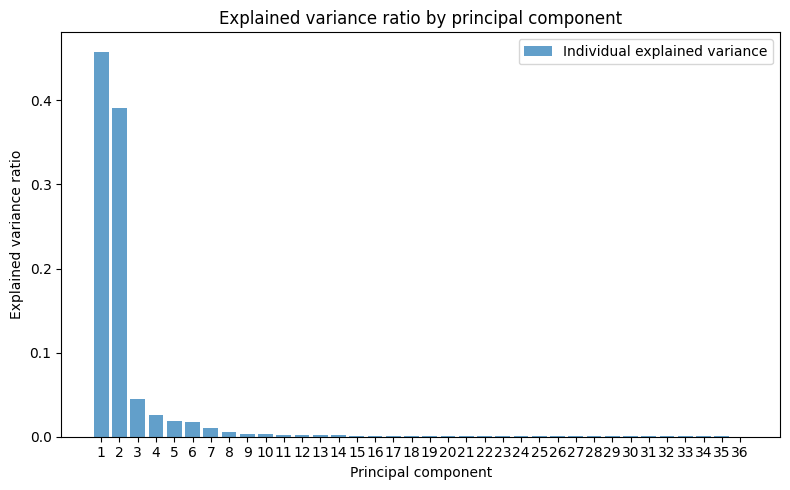

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.title('Explained variance ratio by principal component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

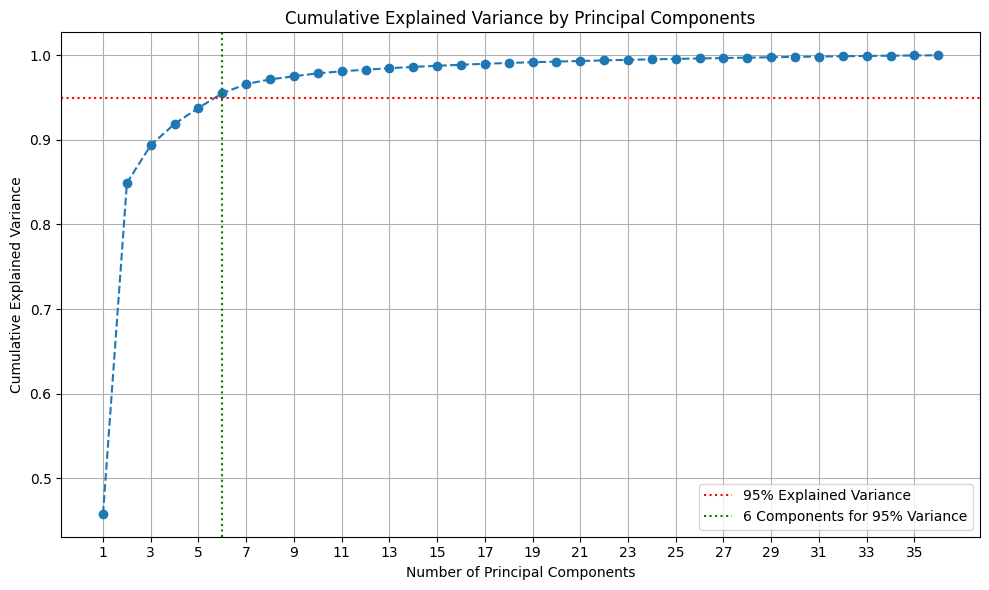

Number of components to explain 95% variance: 6


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get explained variance ratio from the 'pca' object
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cum_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components for 95% variance
num_components_95 = np.where(cum_explained_variance >= 0.95)[0][0] + 1

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.xticks(range(1, len(cum_explained_variance) + 1, 2)) # Adjust x-ticks for better readability

# Add a horizontal line at 95% explained variance
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')

# Add a vertical line at the number of components needed for 95% variance
plt.axvline(x=num_components_95, color='g', linestyle=':', label=f'{num_components_95} Components for 95% Variance')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"Number of components to explain 95% variance: {num_components_95}")

In [19]:
X_pca.shape

(4435, 36)

In [11]:
import matplotlib.pyplot as plt

# Function to plot the PCA visualization with class labels overlaid
def plot_data_projection(X, y):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.5)

    # Create a legend for the plot
    handles, labels = scatter.legend_elements()
    legend1 = ax.legend(handles, labels, loc="lower left", title="Classes", fontsize=8)

    # Add the legend to the plot
    ax.add_artist(legend1)

    # Show the plot

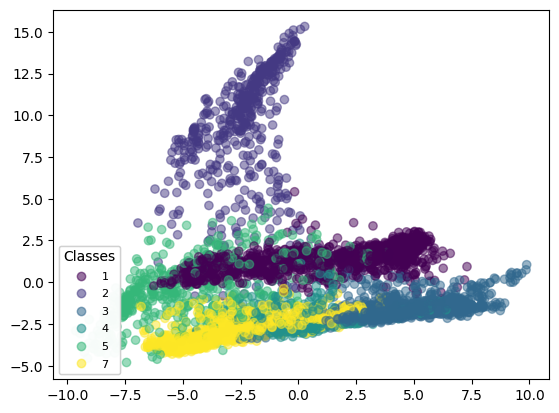

In [21]:
# Now, let's plot the projected data using the first two components
plot_data_projection(X_pca[:,:2], y)